# Medical Appointments Data Analysis Project
### Step-1: Select a large real world data set
- Data was collected from Github(https://github.com/pik1989/EDAforHealthcare)
- Contains: PatientId,AppointmentID,Gender	ScheduledDay,AppointmentDay,Age	Neighbourhood,Scholarship,Hipertension	Diabetes,Alcoholism,Handcap,SMS_received,No-show
- Total 110527 entries and 14 Columns,No Null values
- By analysing the data we will get insigts about what kind of patients are coming to that hospital

import necessary modules for the analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt  

c:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
base_dataset = pd.read_csv("H:\Data Science & Machine Learning\EDA_Project\Medical Data Analysis\Data.csv")

### Step-2: Perform Data Preparation and Cleaning

In [5]:
df = pd.DataFrame(base_dataset)

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# converting object type data to day time format and reducing the time as it all show 0 hours
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]).dt.date.astype("datetime64[ns]")
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]).dt.date.astype("datetime64[ns]")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# converting date to the day of the week
df["SceduledDay_name"] = df["ScheduledDay"].dt.day_name()
df["AppointmentDay_name"] = df["AppointmentDay"].dt.day_name()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SceduledDay_name,AppointmentDay_name
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [10]:
df.drop(["PatientId", "AppointmentID", "ScheduledDay"], axis = 1, inplace= True)

In [11]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SceduledDay_name,AppointmentDay_name
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [12]:
bins = [0, 1, 5, 12, 18, 40, 60, 80, 100, 120]
df["Age"] = pd.cut(df["Age"], bins)

In [13]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,SceduledDay_name,AppointmentDay_name
0,F,2016-04-29,"(60, 80]",JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,M,2016-04-29,"(40, 60]",JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,F,2016-04-29,"(60, 80]",MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,F,2016-04-29,"(5, 12]",PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,F,2016-04-29,"(40, 60]",JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


### Step-3: Perform Exploratory Data Analysis & Visualization

In [14]:
df.describe()

,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-19 00:57:50.008233472,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
min,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-05-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-05-18 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-05-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2016-06-08 00:00:00,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
std,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873


Text(0.5, 1.0, 'Gender distribution')

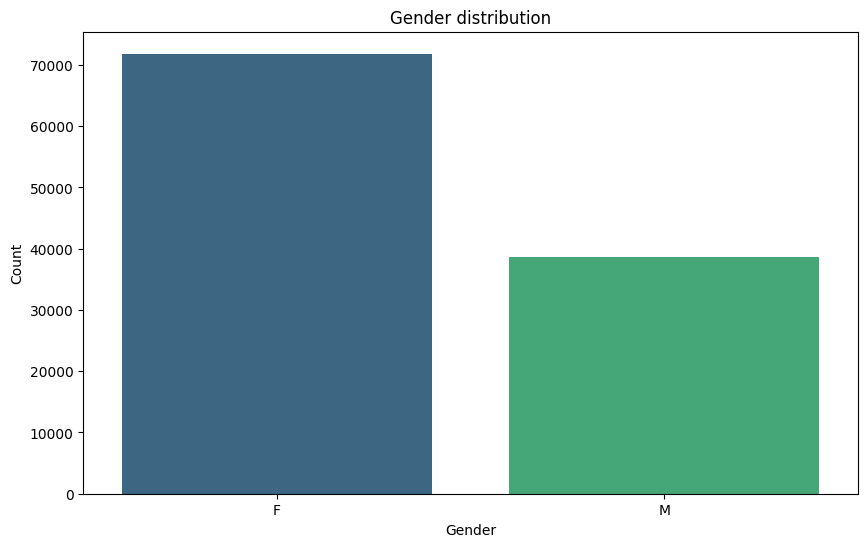

In [15]:
# gender distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender distribution")

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


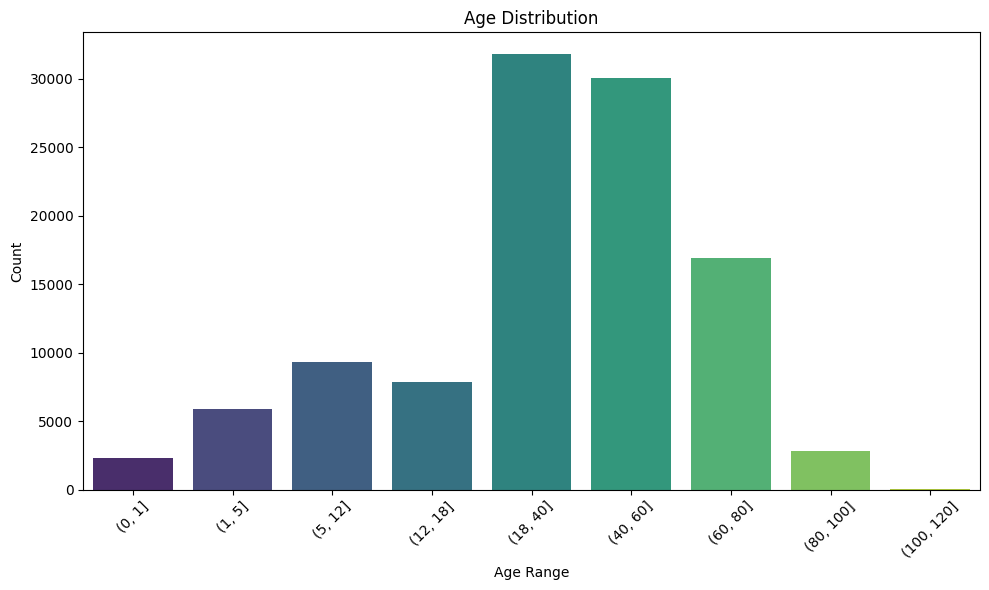

In [16]:
#age distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', palette='viridis')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

Text(0.5, 1.0, 'City Distribution Plot')

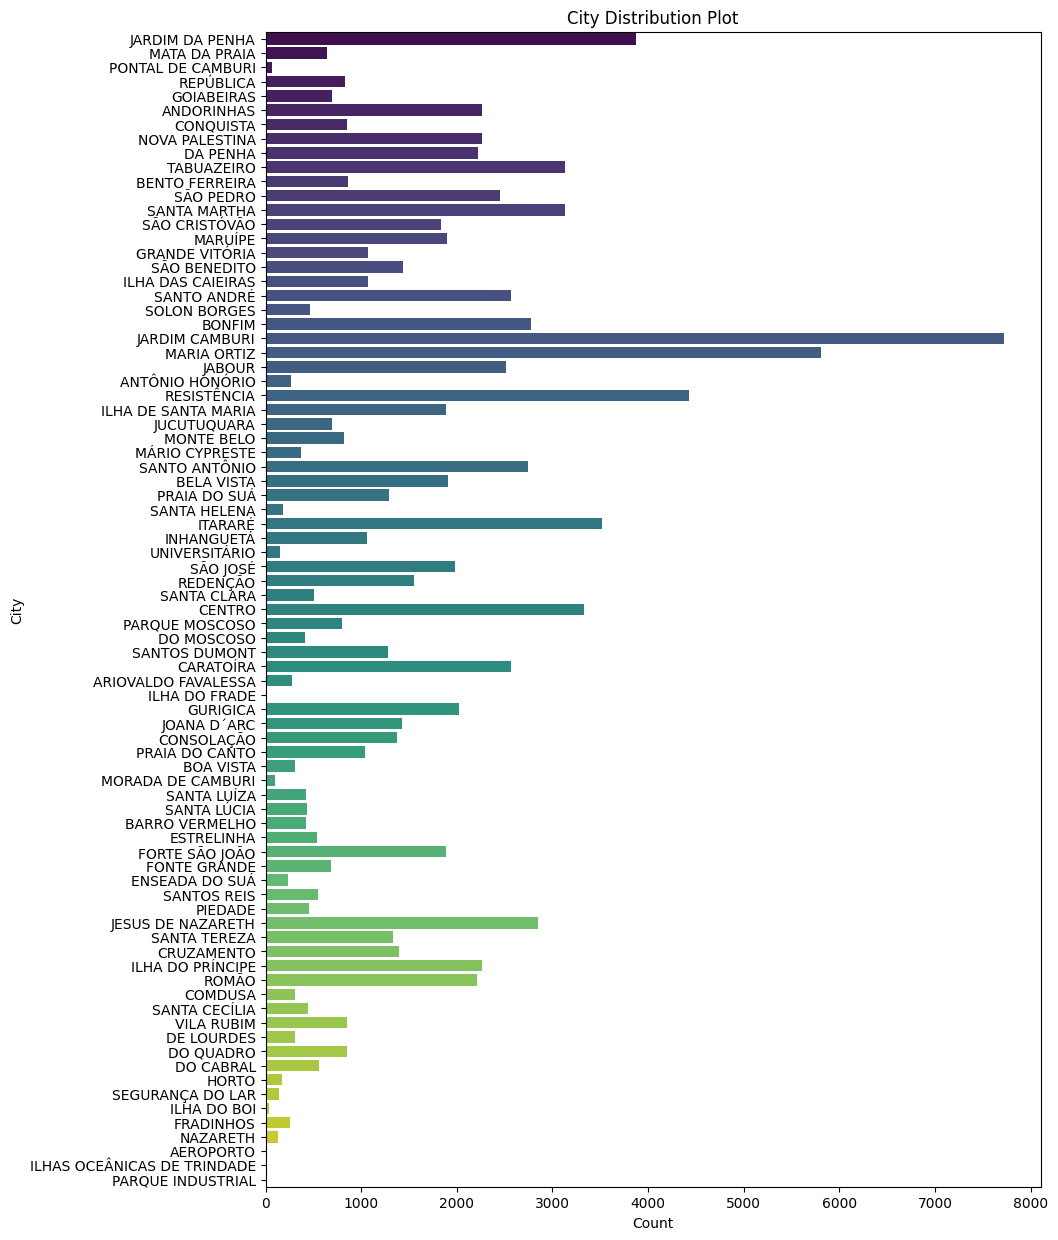

In [17]:
#City/Area distribution plot
plt.figure(figsize=(10, 15))
sns.countplot(data=df, y="Neighbourhood", palette ="viridis")
plt.xlabel("Count")
plt.ylabel("City")
plt.title("City Distribution Plot")

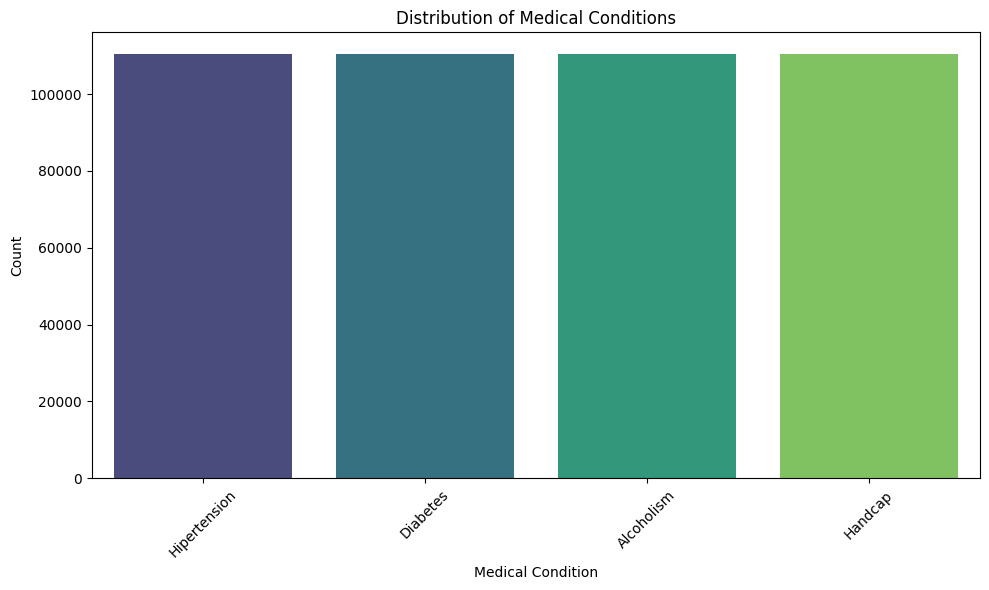

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']], palette='viridis')
plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

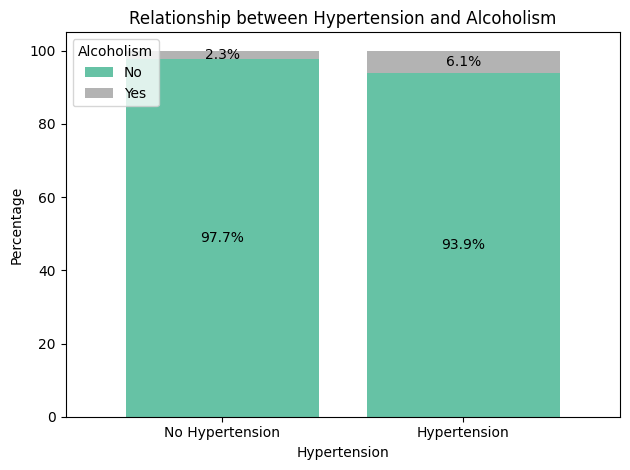

In [19]:
grouped = df.groupby(['Hipertension', 'Alcoholism']).size().unstack()

# Calculate percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = grouped_percentage.plot(kind='bar', stacked=True, width=0.8, colormap='Set2')

# Annotate bars with percentage values
for bar in bars.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy() 
    bars.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.title('Relationship between Hypertension and Alcoholism')
plt.xlabel('Hypertension')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'], rotation=0)
plt.legend(title='Alcoholism', labels=['No', 'Yes'], loc='upper left')
plt.tight_layout()

Text(0.5, 1.0, 'Most Busy day of the week')

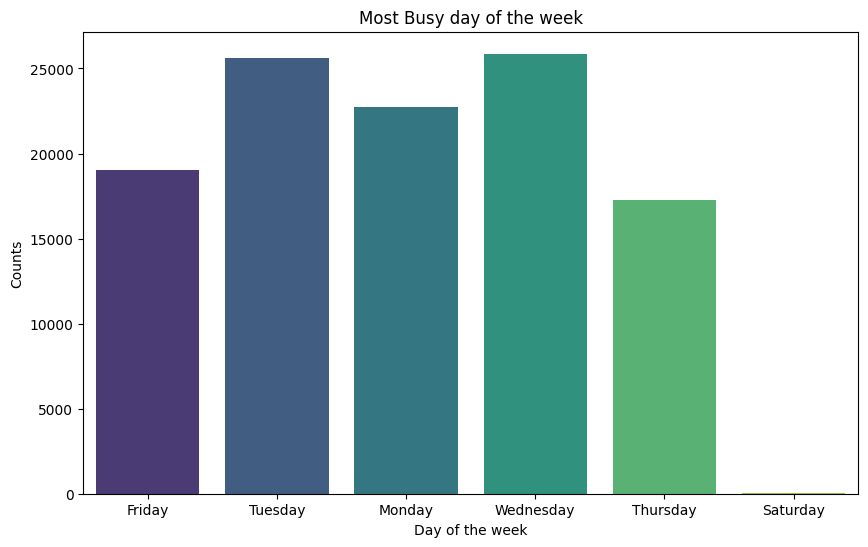

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = "AppointmentDay_name", palette="viridis")
plt.xlabel("Day of the week")
plt.ylabel("Counts")
plt.title("Most Busy day of the week")

### Step-4: Questions & Answers for the analysis
- Which gender  are making more appointments? <font color='green'> **Ans: Female** </font>
- Which age range are making more appointments? <font color='green'> **Ans: 18-40** </font>
- From which top 5 city most patients are coming from?<font color='green'> **Ans: 1)Jardim Camburi, 2)Maria Ortiz, 3) Resistencia, 4)Jardim Da Penha, 5)Itarape** </font>
- Which problem most patients are having?(Hipertension,Diabetes,Alocholism,Handcap) <font color='green'> **Ans: Almost all patients are same in number** </font>
- Are most hypertension patients being alchoholic?<font color='green'> **Ans: There is less co-relation between hypertension and alchoholic as 6.1% people with hyper tension are consuming alcohol** </font>
- which day of the week Sceduling appointments are being made most and least?<font color='green'> **Ans: Wednesday and Tuesday are most busy day. Thusday is a less busy day,Saturday is Off day** </font>